Hunter Bennett  
Glass Lab  
180515

Notebook for exploration of WGCNA R package using the liver strains data. Following the tutorial PDF for the WGCNA package found here:  

https://labs.genetics.ucla.edu/horvath/CoexpressionNetwork/Rpackages/WGCNA/Tutorials/index.html

In [1]:
# User defined functions
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [8]:
setwd('~/liverStrains/results/')

In [9]:
outdir <- '180515_WGCNA/'

In [5]:
library(WGCNA)
enableWGCNAThreads(nThreads=16)

Allowing parallel execution with up to 16 working processes.


In [5]:
options(stringsAsFactors = FALSE)
liverData = read.csv(paste0(outdir,'expression/rna_exp_rpkm.tsv'),
                    sep='\t')

In [6]:
liverData <- liverData[-grep('chrM|random|chrX|chrY|chrUn', liverData$chr),]


In [7]:
table(liverData$chr)


 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2  chr3 
 1361  1158  1844   842   943   881   910   756  1202   600   798  2062  1149 
 chr4  chr5  chr6  chr7  chr8  chr9 
 1462  1388  1301  2218  1178  1358 

In [8]:
head(liverData)

Transcript.RepeatID..cmd.analyzeRepeats.pl.rna.mm10..count.exons..condenseGenes..rpkm..d...tag_directories_rna.aj_KupfferTotal_RNA_AMLNDiet_30week_AJ3B...tag_directories_rna.aj_KupfferTotal_RNA_AMLNDiet_30week_AJ3c...tag_directories_rna.aj_Tim4PosKupffer_RNA_CCl4_6weeks_AJ12a...tag_directories_rna.aj_Tim4PosKupffer_RNA_CCl4_6weeks_AJ12b...tag_directories_rna.aj_Tim4PosKupffer_RNA_CCl4_6weeks_AJ13a...tag_directories_rna.aj_Tim4PosKupffer_RNA_CCl4_6weeks_AJ13b...tag_directories_rna.aj_Tim4PosKupffer_RNA_Control_AJ11A...tag_directories_rna.aj_Tim4PosKupffer_RNA_Control_AJ11B...tag_directories_rna.balbc_KupfferTotal_RNA_AMLNDiet_30week_Balb3a...tag_directories_rna.balbc_KupfferTotal_RNA_AMLNDiet_30week_Balb3B...tag_directories_rna.balbc_KupfferTotal_RNA_AMLNDiet_30week_Balb3C...tag_directories_rna.balbc_KupfferTotal_RNA_AMLNDiet_30week_Balb3d...tag_directories_rna.balbc_Tim4PosKupffer_RNA_CCl4_6weeks_Balb12b...tag_directories_rna.balbc_Tim4PosKupffer_RNA_CCl4_6weeks_Balb13a...tag_directories_rna.balbc_Tim4PosKupffer_RNA_Control_Balb11A...tag_directories_rna.balbc_Tim4PosKupffer_RNA_Control_Balb11B...tag_directories_rna.C57Bl6_Kupffer_RNA_Control_LN12aM...tag_directories_rna.C57Bl6_Kupffer_RNA_Control_LN36cM...tag_directories_rna.C57Bl6_Kupffer_RNA_Control_LN38aM...tag_directories_rna.C57Bl6_KupfferTim4Pos_RNA_AMLNDiet_30week_LN144B...tag_directories_rna.C57Bl6_KupfferTim4Pos_RNA_AMLNDiet_30week_LN146C...tag_directories_rna.C57Bl6_KupfferTim4Pos_RNA_AMLNDiet_30week_LN146D...tag_directories_rna.C57Bl6_KupfferTim4Pos_RNA_AMLNDiet_30week_LN152B...tag_directories_rna.C57Bl6_KupfferTim4Pos_RNA_CCl4_6weeks_CC1B...tag_directories_rna.C57Bl6_KupfferTim4Pos_RNA_CCl4_6weeks_CC1C...tag_directories_rna.C57Bl6_KupfferTim4Pos_RNA_CCl4_6weeks_CC1D...tag_directories_rna.C57Bl6_KupfferTotal_RNA_AMLNDiet_30week_LN136C...tag_directories_rna.C57Bl6_KupfferTotal_RNA_AMLNDiet_30week_LN141A.,chr,start,end,strand,Length,Copies,Annotation.Divergence,..tag_directories_rna.aj_KupfferTotal_RNA_AMLNDiet_30week_AJ3B.FPKM,..tag_directories_rna.aj_KupfferTotal_RNA_AMLNDiet_30week_AJ3c.FPKM,⋯,..tag_directories_rna.C57Bl6_Kupffer_RNA_Control_LN38aM.FPKM,..tag_directories_rna.C57Bl6_KupfferTim4Pos_RNA_AMLNDiet_30week_LN144B.FPKM,..tag_directories_rna.C57Bl6_KupfferTim4Pos_RNA_AMLNDiet_30week_LN146C.FPKM,..tag_directories_rna.C57Bl6_KupfferTim4Pos_RNA_AMLNDiet_30week_LN146D.FPKM,..tag_directories_rna.C57Bl6_KupfferTim4Pos_RNA_AMLNDiet_30week_LN152B.FPKM,..tag_directories_rna.C57Bl6_KupfferTim4Pos_RNA_CCl4_6weeks_CC1B.FPKM,..tag_directories_rna.C57Bl6_KupfferTim4Pos_RNA_CCl4_6weeks_CC1C.FPKM,..tag_directories_rna.C57Bl6_KupfferTim4Pos_RNA_CCl4_6weeks_CC1D.FPKM,..tag_directories_rna.C57Bl6_KupfferTotal_RNA_AMLNDiet_30week_LN136C.FPKM,..tag_directories_rna.C57Bl6_KupfferTotal_RNA_AMLNDiet_30week_LN141A.FPKM
NM_172405,chr5,100804802,100820935,-,2488,1,Fam175a|3830405G04Rik|5630400M01Rik|AI506069|AL024423|AV118690|Ccdc98|-|5|5 E4|protein-coding,1.752,1.024,⋯,2.558,1.753,1.515,1.186,1.441,0.950,1.475,1.422,1.062,1.451
NM_001166375,chr8,66386301,66471637,+,3936,1,March1|2900024D24Rik|BB085186|-|8|8 B3.1|protein-coding,56.246,33.377,⋯,42.960,37.690,42.983,39.337,34.861,56.548,63.953,66.175,30.057,21.672
NM_178061,chr4,34949074,35157484,-,6024,1,Mob3b|8430436F23Rik|A430018A01Rik|Mobkl2b|-|4 A5|4 16.86 cM|protein-coding,1.212,0.674,⋯,0.992,0.756,0.353,0.627,0.646,0.576,0.853,0.618,0.614,0.883
NR_029557,chr18,61647825,61647894,-,69,1,Mir145a|Mir145|Mirn145|mir-145a|mmu-mir-145|mmu-mir-145a|-|18 E1|18|ncRNA,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
NR_045798,chr13,64248700,64268145,+,1799,1,1810034E14Rik|-|-|13|13 B3|ncRNA,0.525,0.823,⋯,0.938,1.180,1.026,1.567,1.142,1.847,0.853,1.449,1.339,1.112
NM_013933,chr17,65580053,65613555,-,1635,1,Vapa|33kDa|VAP33|-|17|17 E1.1|protein-coding,64.907,29.323,⋯,70.568,57.395,50.977,59.620,49.583,60.297,72.080,58.734,36.466,43.606


In [9]:
datExpr0 = as.data.frame(t(liverData));
datExpr0 = datExpr0[-c(1:8),]
datExpr0 <- sapply(datExpr0, as.numeric)
colnames(datExpr0) <- liverData[, 1]

In [10]:
head(datExpr0)

NM_172405,NM_001166375,NM_178061,NR_029557,NR_045798,NM_013933,NM_023116,NM_007760,NM_134072,NM_018773,⋯,NR_027448,NR_028391,NR_045354,NM_001201391,NM_011288,NM_145965,NM_001085500,NM_175024,NM_007701,NM_008424
1.752,56.246,1.212,0,0.525,64.907,0.053,17.839,1.143,66.220,⋯,0.062,0,0.681,123.822,0.274,7.408,3.847,0.000,0,0
1.024,33.377,0.674,0,0.823,29.323,0.061,21.663,0.523,57.497,⋯,0.203,0,1.117,201.891,0.120,8.502,3.549,0.619,0,0
0.997,44.275,0.714,0,0.985,61.233,0.000,18.340,0.042,65.668,⋯,0.000,0,0.205,4.231,0.000,6.862,5.906,0.000,0,0
1.556,45.945,0.815,0,0.000,60.410,0.000,17.279,0.333,62.787,⋯,0.000,0,0.183,8.805,0.078,6.474,4.459,0.000,0,0
2.113,30.475,0.627,0,0.880,73.053,0.000,21.761,0.587,75.622,⋯,0.000,0,0.373,0.242,0.266,5.439,4.433,0.000,0,0
1.430,37.502,0.648,0,0.893,63.157,0.000,22.045,0.731,76.867,⋯,0.169,0,0.419,2.262,0.000,5.465,4.748,0.000,0,0


In [11]:
datExpr0 = as.data.frame(t(liverData));
datExpr0 = datExpr0[-c(1:8),]
datExpr0 <- sapply(datExpr0, as.numeric)
colnames(datExpr0) <- liverData[, 1]
row_labs = strsplit(names(liverData[,-(1:8)]), "\\.")
row_labs = do.call("rbind", lapply(row_labs, "[[", 4))
rownames(datExpr0) <- row_labs

In [12]:
# check samples to see if we have too many missing values
gsg = goodSamplesGenes(datExpr0, verbose = 3);
gsg$allOK

 Flagging genes and samples with too many missing values...
  ..step 1
  ..Excluding 4212 genes from the calculation due to too many missing samples or zero variance.
  ..step 2


[1] FALSE

In [13]:
# remove samples or genes with too much missing data
if (!gsg$allOK)
{
# Optionally, print the gene and sample names that were removed:
if (sum(!gsg$goodGenes)>0)
printFlush(paste("Removing genes:", paste(names(datExpr0)[!gsg$goodGenes], collapse = ", ")));
if (sum(!gsg$goodSamples)>0)
printFlush(paste("Removing samples:", paste(rownames(datExpr0)[!gsg$goodSamples], collapse = ", ")));
# Remove the offending genes and samples from the data:
datExpr0 = datExpr0[gsg$goodSamples, gsg$goodGenes]
}

Removing genes: 


In [14]:
# Further remove genes - Inge recommends getting your gene pool down to around ~10k to facilitate analysis
dim(datExpr0)

[1]    28 19199

In [15]:
# Require highly expressed genes, in this case RPKM > 2 across more than two samples
datExpr0 = datExpr0[, colSums(datExpr0 > 2) > 2]

In [16]:
dim(datExpr0)

[1]    28 11254

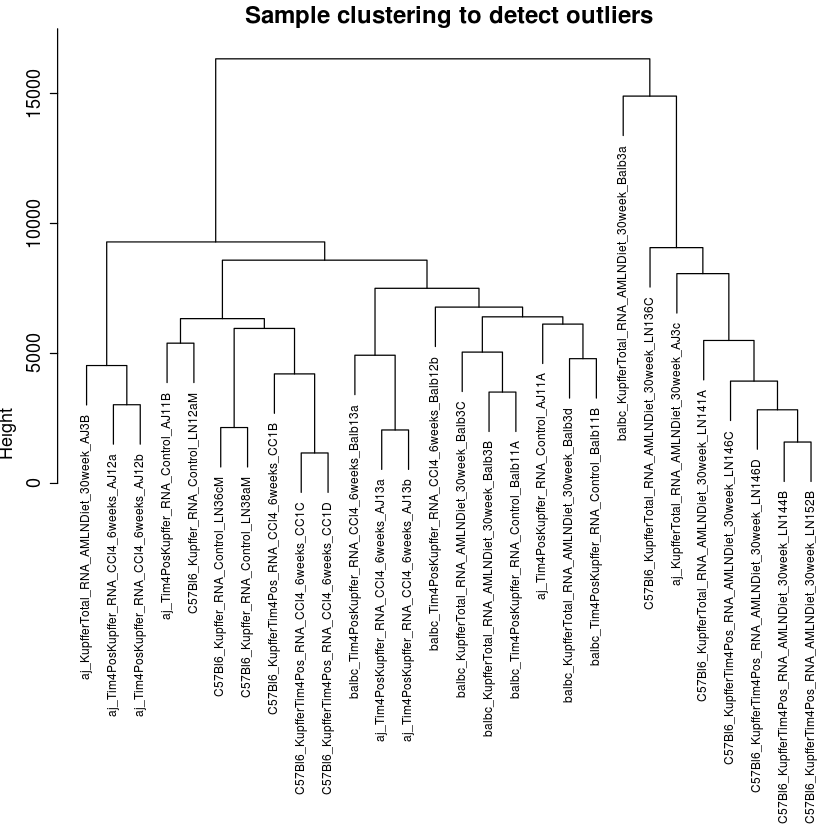

In [17]:
#cluster samples to see if we have outliers
sampleTree = hclust(dist(datExpr0), method = "average");
# Plot the sample tree: Open a graphic output window of size 12 by 9 inches
# The user should change the dimensions if the window is too large or too small.|
#pdf(file = "Plots/sampleClustering.pdf", width = 12, height = 9);
par(cex = 0.6);
par(mar = c(0,4,2,0))
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="", cex.lab = 1.5,
    cex.axis = 1.5, cex.main = 2)

In [8]:
# Remove outliers here, we seem to be okay though!
# Determine cluster under the line
# clust <- cutreeStatic(sampleTree, cutHeight = 600000, minSize = 10)
# table(clust)
# clust 1 contains the samples we want to keep.
# keepSamples <- (clust==1)
# datExpr <- datExpr0[keepSamples, ]
# nGenes =<-ncol(datExpr)
# nSamples <- nrow(datExpr)
datExpr <- datExpr0

ERROR: Error in eval(expr, envir, enclos): object 'datExpr0' not found


In [ ]:
# now we load in the "clinical trait data"
traitData <- read.csv(paste0(outdir,'samples.txt'),
                    sep='\t')
dim(traitData)
names(traitData)

datTraits <- traitData

In [20]:
# remove unneeded traits
# allTraits <- traitData[, -c(1, 4, 10)];
# kup <- (traitData$sample_type=='kupffer')
# allTraits <- allTraits[kup,]
# # remove 3A
# allTraits <- allTraits[-6,]

In [21]:
# make data frame matching expression set that holds clinical traits
# kupSamples <- gsub('\\.FPKM', '', rownames(datExpr));
# traitRows <- match(kupSamples, allTraits$subject);
# datTraits <- allTraits[traitRows, -1];
# rownames(datTraits) <- allTraits[traitRows, 1];

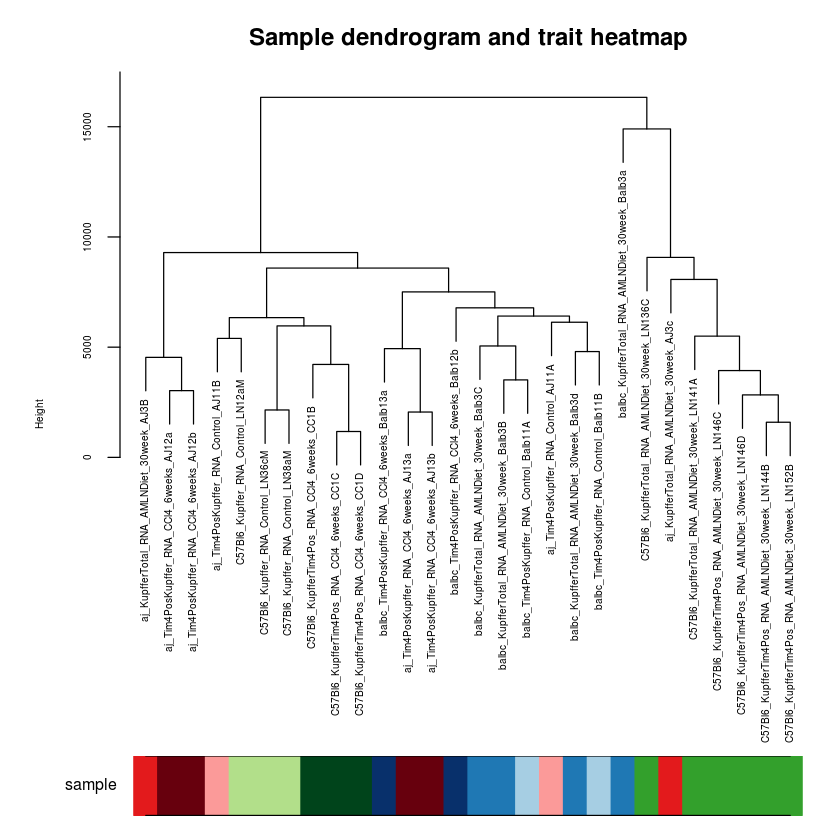

In [22]:
# Re-cluster samples
sampleTree2 = hclust(dist(datExpr), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors = traitData$color;
# Plot the sample dendrogram and the colors underneath.
plotDendroAndColors(sampleTree2, traitColors,
                    groupLabels = names(traitData),
                    main = "Sample dendrogram and trait heatmap",
                    xlab="", cex.lab = 0.5,
                    cex.axis = 0.5, cex.dendroLabels=0.5,
                    autoColorHeight = FALSE, colorHeight = 0.1)

In [23]:
save(datExpr, datTraits, file = paste0(outdir,"amlnKupffer-01-dataInput.RData"))

In [27]:
# if starting here..
lnames = load(file = paste0(outdir,"amlnKupffer-01-dataInput.RData"));

In [ ]:
# Do initial WGCNA analysis
# enable multithreads
enableWGCNAThreads(nThreads=16)

pickSoftThreshold: will use block size 3975.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 3975 of 11254
   ..working on genes 3976 through 7950 of 11254
   ..working on genes 7951 through 11254 of 11254
   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.5230  2.900          0.970 3200.00   3210.00   4690
2      2   0.0503  0.410          0.916 1350.00   1320.00   2650
3      3   0.1190 -0.565          0.889  693.00    652.00   1720
4      4   0.3900 -1.110          0.899  398.00    360.00   1200
5      5   0.5490 -1.450          0.912  248.00    213.00    884
6      6   0.6200 -1.640          0.912  164.00    133.00    672
7      7   0.6600 -1.750          0.916  113.00     86.60    524
8      8   0.6610 -1.830          0.901   81.50     58.30    416
9      9   0.6800 -1.830          0.894   60.30     40.10    336
10    10   0.7180 -1.740          0.886   45.90     28.30    275
11    12   0.8590 -1.590      

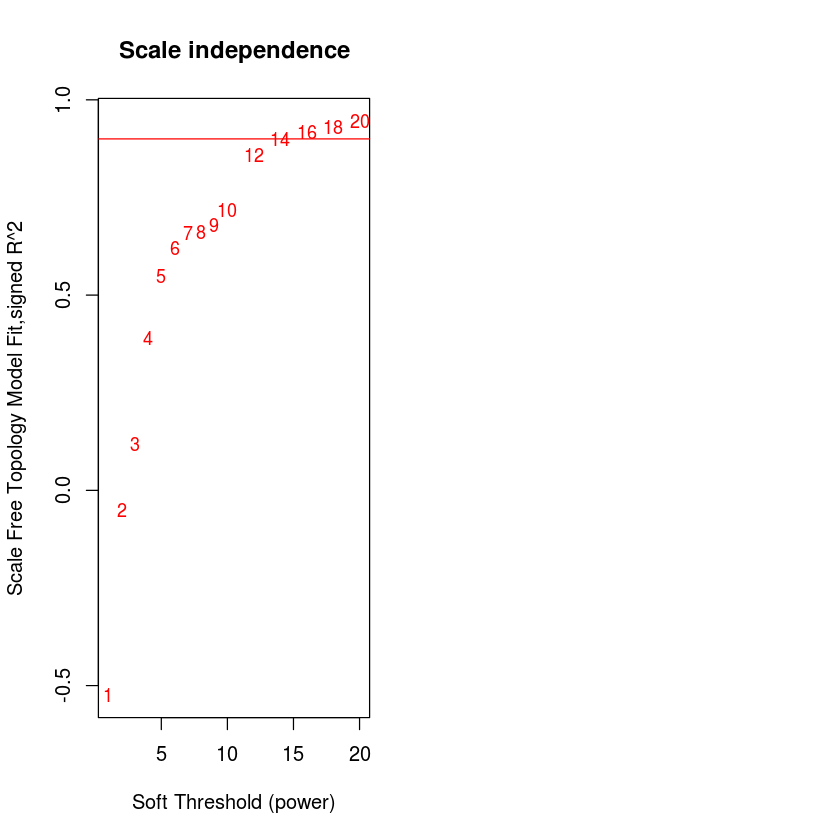

In [26]:
# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to=20, by=2))
# Call the network topology analysis function
sft = pickSoftThreshold(datExpr, powerVector = powers, verbose = 5)
# Plot the results:
par(mfrow = c(1,2));
cex1 = 0.9;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")

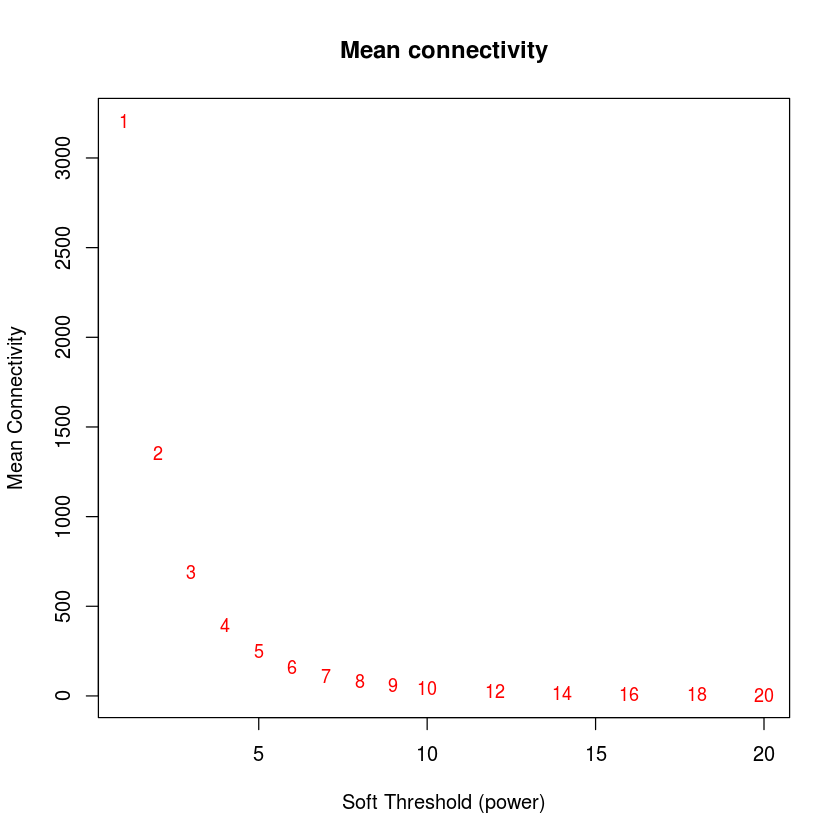

In [27]:
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

### This is the 'one step' method for network construction

In [71]:
# currently we are just running this 'out of the box' settings except for a higher max block
# can use more blocks because we have a cluster with sig more RAM
# net = blockwiseModules(datExpr, power = 20,
#                        TOMType = "signed", minModuleSize = 250,
#                        reassignThreshold = 0, mergeCutHeight = 0.25,
#                        detectCutHeight = 0.99,
#                        numericLabels = TRUE, pamStage=TRUE,
#                        pamRespectsDendro = FALSE,
#                        saveTOMs = TRUE,
#                        saveTOMFileBase = paste0(outdir, "kupfferTOM"),
#                        verbose = 3,
#                        maxBlockSize=20000)

In [72]:
# nnames = load(paste0(outdir, "kupfferTOM-block.1.RData"))

In [73]:
# summary(TOM)

In [74]:
## Convert labels to colors for plotting
# mergedColors = labels2colors(net$colors)
# Plot the dendrogram and the module colors underneath
# plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
#         "Module colors",
#         dendroLabels = FALSE, hang = 0.03,
#         addGuide = TRUE, guideHang = 0.05)

In [75]:
# moduleLabels = net$colors
# moduleColors = labels2colors(net$colors)
# MEs = net$MEs;
# geneTree = net$dendrograms[[1]];
# save(MEs, moduleLabels, moduleColors, geneTree,
#      file = paste0(outdir, "kupfferTOM-02-networkConstruction-auto.RData"))

### Instead here we will do the "long" way
____
taken from the excellent tutorial for WGCNA  

https://labs.genetics.ucla.edu/horvath/CoexpressionNetwork/Rpackages/WGCNA/Tutorials/FemaleLiver-02-networkConstr-man.pdf

In [7]:
# calculate the adjacencies
softPower = 14
adjacency = adjacency(datExpr, power = softPower);

In [8]:
# Turn adjacency into topological overlap 
# have to re-run this with a signed network :(
TOM = TOMsimilarity(adjacency, TOMType="signed", verbose=2);
dissTOM = 1-TOM

..connectivity..
..matrix multiplication..
..normalization..
..done.


In [9]:
### Lets check how different the gene tree is using the mean function instead of min...
TOM_mean = TOMsimilarity(adjacency, TOMType="signed", TOMDenom='mean', verbose=2);
dissTOM_mean = 1-TOM_mean

..connectivity..
..matrix multiplication..
..normalization..
..done.


In [10]:
save(TOM, dissTOM, TOM_mean, dissTOM_mean, file = paste0(outdir,"180117_WGCNA_TOM.RData"))

In [10]:
tnames = load(file = paste0(outdir,"180117_WGCNA_TOM.RData"));
lnames = load(file = paste0(outdir,"amlnKupffer-01-dataInput.RData"));

In [11]:
tnames

[1] "TOM"          "dissTOM"      "TOM_mean"     "dissTOM_mean"

In [12]:
# Call the hierarchical clustering function
geneTree = hclust(as.dist(dissTOM), method = "average");

In [13]:
dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,
        deepSplit = 2, pamRespectsDendro = FALSE,
        minClusterSize = 100)

 ..cutHeight not given, setting it to 0.997  ===>  99% of the (truncated) height range in dendro.
 ..done.


In [14]:
# Convert numeric lables into colors
dynamicColors = labels2colors(dynamicMods)
table(dynamicColors)


dynamicColors
       black         blue        brown         cyan        green  greenyellow 
         598         1104          844          297          764          470 
        grey       grey60    lightcyan   lightgreen  lightyellow      magenta 
         887          202          210          194          170          517 
midnightblue         pink       purple          red    royalblue       salmon 
         240          531          513          697          137          417 
         tan    turquoise       yellow 
         432         1204          826 

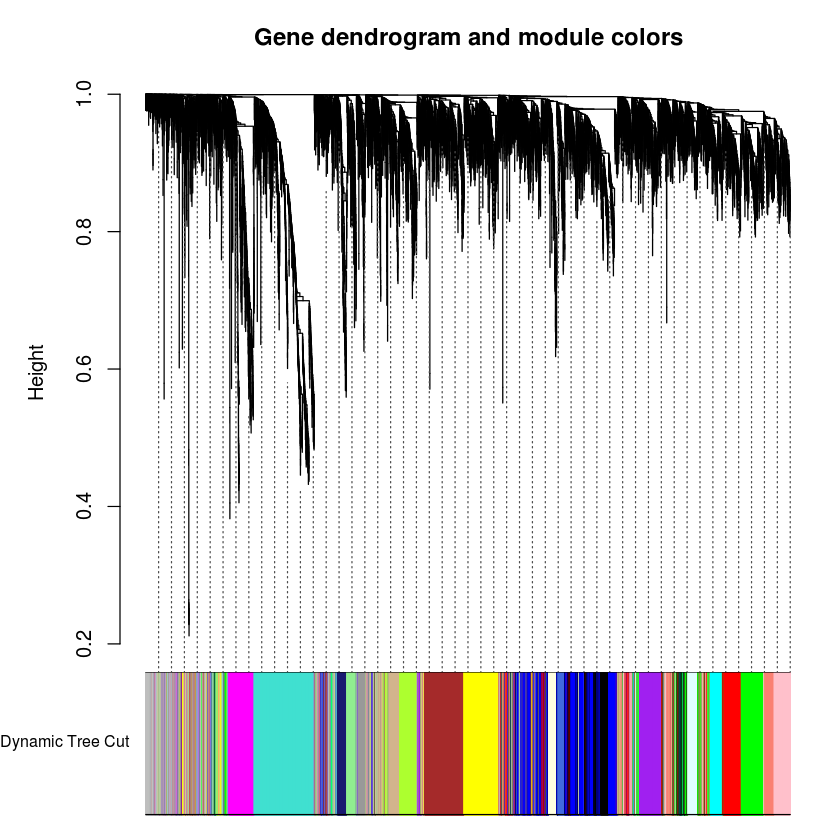

In [15]:
# Plot the dendrogram and colors underneath
plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05,
main = "Gene dendrogram and module colors")

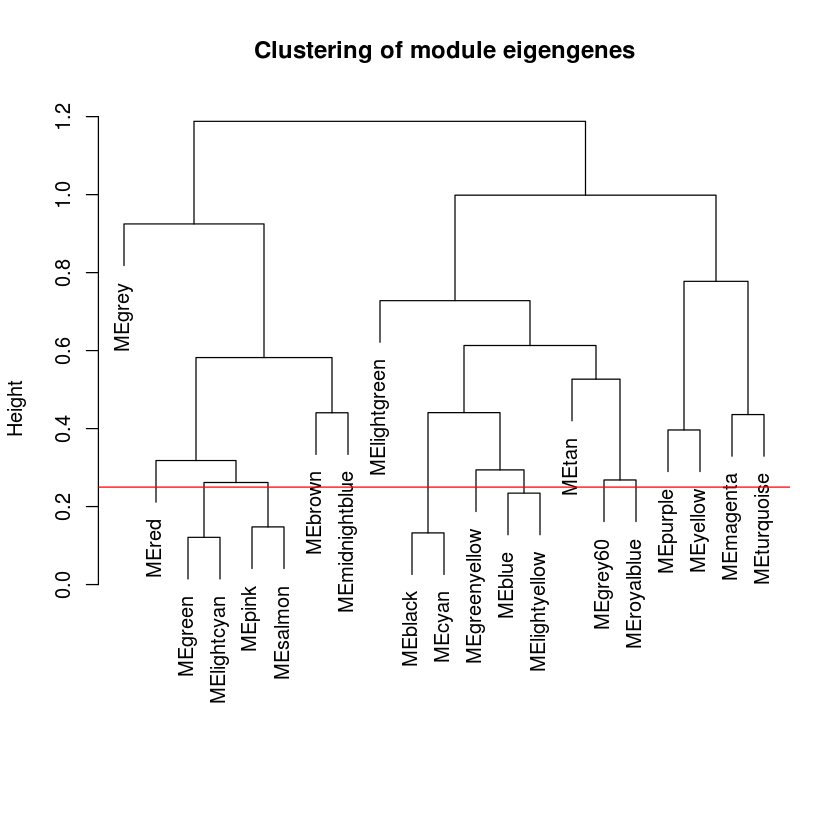

In [16]:
# Calculate eigengenes
MEList = moduleEigengenes(datExpr, colors = dynamicColors)
MEs = MEList$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss = 1-cor(MEs);
# Cluster module eigengenes
METree = hclust(as.dist(MEDiss), method = "average");
# Plot the result
plot(METree, main = "Clustering of module eigengenes",
xlab = "", sub = "")


MEDissThres = 0.25
# Plot the cut line into the dendrogra
abline(h=0.25, col = "red")

In [17]:
# Call an automatic merging function
merge = mergeCloseModules(datExpr, dynamicColors, cutHeight = MEDissThres, verbose = 3)
# The merged module colors
mergedColors = merge$colors;
# Eigengenes of the new merged modules:
mergedMEs = merge$newMEs;

 mergeCloseModules: Merging modules whose distance is less than 0.25
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 21 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 17 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 15 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 15 module eigengenes in given set.


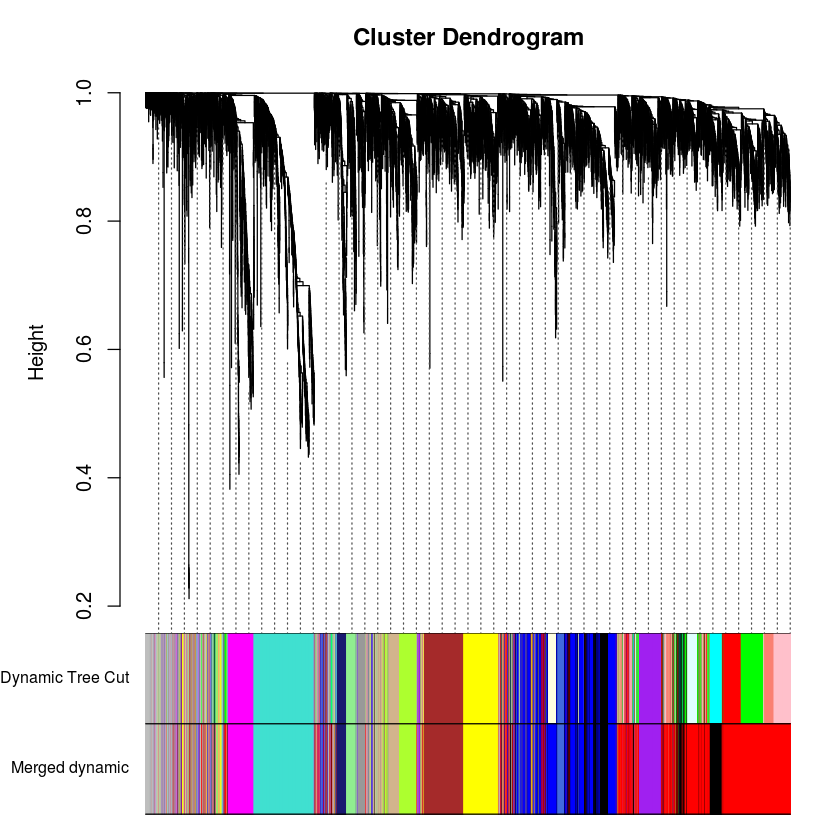

In [18]:
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
        c("Dynamic Tree Cut", "Merged dynamic"),
        dendroLabels = FALSE, hang = 0.03,
        addGuide = TRUE, guideHang = 0.05)

In [19]:
##Change the module colors to a nice palletthat is ordered in size 
library(RColorBrewer)
col_clusters = colorRampPalette(brewer.pal(11,'Spectral'))(length(unique(mergedColors)))

brewer_dynamicColors = mergedColors 

counter = 1 
for (color in names(sort(table(mergedColors)))){
    if (color == 'grey'){
        brewer_dynamicColors[mergedColors == color] = '#D3D3D3'
        print('grey')
        }
    else
        brewer_dynamicColors[mergedColors == color] = col_clusters[counter]
        counter = counter + 1
    }

[1] "grey"


In [23]:
brewer_dynamicColors

[1] "#CCEA9D" "#5E4FA2" "#5E4FA2" "#EDF7A3" "#E25249" "#C52C4B" "#FEE899"
    [8] "#C52C4B" "#48A0B2" "#48A0B2" "#FDCA78" "#5E4FA2" "#5E4FA2" "#F57647"
   [15] "#3E77B5" "#48A0B2" "#6FC5A4" "#CCEA9D" "#EDF7A3" "#5E4FA2" "#5E4FA2"
   [22] "#6FC5A4" "#F57647" "#5E4FA2" "#D3D3D3" "#FEE899" "#6FC5A4" "#5E4FA2"
   [29] "#6FC5A4" "#3E77B5" "#5E4FA2" "#3E77B5" "#5E4FA2" "#5E4FA2" "#48A0B2"
   [36] "#48A0B2" "#FDCA78" "#5E4FA2" "#6FC5A4" "#D3D3D3" "#FDCA78" "#FBA45C"
   [43] "#EDF7A3" "#48A0B2" "#CCEA9D" "#FFFFBF" "#5E4FA2" "#CCEA9D" "#EDF7A3"
   [50] "#48A0B2" "#48A0B2" "#5E4FA2" "#FEE899" "#EDF7A3" "#5E4FA2" "#FBA45C"
   [57] "#5E4FA2" "#EDF7A3" "#48A0B2" "#3E77B5" "#5E4FA2" "#C52C4B" "#EDF7A3"
   [64] "#EDF7A3" "#CCEA9D" "#5E4FA2" "#D3D3D3" "#48A0B2" "#5E4FA2" "#5E4FA2"
   [71] "#D3D3D3" "#5E4FA2" "#5E4FA2" "#CCEA9D" "#FDCA78" "#5E4FA2" "#48A0B2"
   [78] "#5E4FA2" "#5E4FA2" "#CCEA9D" "#48A0B2" "#EDF7A3" "#CCEA9D" "#FDCA78"
   [85] "#CCEA9D" "#48A0B2" "#48A0B2" "#F57647" "#48A0B2" "#5E4FA2" "#5E4FA2"
   [92] "#CCEA9D" "#FEE899" "#3E77B5" "#3E77B5" "#5E4FA2" "#5E4FA2" "#5E4FA2"
   [99] "#5E4FA2" "#EDF7A3" "#48A0B2" "#5E4FA2" "#FFFFBF" "#5E4FA2" "#5E4FA2"
  [106] "#5E4FA2" "#48A0B2" "#EDF7A3" "#FFFFBF" "#6FC5A4" "#C52C4B" "#CCEA9D"
  [113] "#EDF7A3" "#48A0B2" "#3E77B5" "#48A0B2" "#FDCA78" "#FDCA78" "#FFFFBF"
  [120] "#FDCA78" "#CCEA9D" "#FEE899" "#EDF7A3" "#CCEA9D" "#5E4FA2" "#CCEA9D"
  [127] "#FFFFBF" "#48A0B2" "#D3D3D3" "#3E77B5" "#3E77B5" "#CCEA9D" "#5E4FA2"
  [134] "#3E77B5" "#FEE899" "#FFFFBF" "#EDF7A3" "#5E4FA2" "#48A0B2" "#FBA45C"
  [141] "#EDF7A3" "#5E4FA2" "#48A0B2" "#5E4FA2" "#FEE899" "#FFFFBF" "#C52C4B"
  [148] "#5E4FA2" "#FDCA78" "#5E4FA2" "#5E4FA2" "#EDF7A3" "#FEE899" "#3E77B5"
  [155] "#D3D3D3" "#5E4FA2" "#3E77B5" "#E25249" "#D3D3D3" "#5E4FA2" "#48A0B2"
  [162] "#48A0B2" "#CCEA9D" "#CCEA9D" "#EDF7A3" "#D3D3D3" "#6FC5A4" "#6FC5A4"
  [169] "#48A0B2" "#FEE899" "#5E4FA2" "#3E77B5" "#C52C4B" "#6FC5A4" "#3E77B5"
  [176] "#FBA45C" "#CCEA9D" "#5E4FA2" "#FDCA78" "#FEE899" "#5E4FA2" "#48A0B2"
  [183] "#3E77B5" "#3E77B5" "#48A0B2" "#3E77B5" "#5E4FA2" "#C52C4B" "#D3D3D3"
  [190] "#5E4FA2" "#D3D3D3" "#5E4FA2" "#6FC5A4" "#FEE899" "#E25249" "#5E4FA2"
  [197] "#5E4FA2" "#EDF7A3" "#6FC5A4" "#CCEA9D" "#3E77B5" "#D3D3D3" "#5E4FA2"
  [204] "#EDF7A3" "#E25249" "#D3D3D3" "#FEE899" "#EDF7A3" "#5E4FA2" "#48A0B2"
  [211] "#48A0B2" "#EDF7A3" "#D3D3D3" "#3E77B5" "#48A0B2" "#EDF7A3" "#5E4FA2"
  [218] "#EDF7A3" "#D3D3D3" "#FFFFBF" "#D3D3D3" "#FEE899" "#FDCA78" "#3E77B5"
  [225] "#FDCA78" "#E25249" "#5E4FA2" "#F57647" "#3E77B5" "#5E4FA2" "#5E4FA2"
  [232] "#48A0B2" "#3E77B5" "#FFFFBF" "#3E77B5" "#FEE899" "#D3D3D3" "#3E77B5"
  [239] "#6FC5A4" "#5E4FA2" "#FEE899" "#5E4FA2" "#FDCA78" "#FEE899" "#5E4FA2"
  [246] "#3E77B5" "#6FC5A4" "#FFFFBF" "#3E77B5" "#FFFFBF" "#5E4FA2" "#FEE899"
  [253] "#FDCA78" "#6FC5A4" "#D3D3D3" "#5E4FA2" "#EDF7A3" "#48A0B2" "#D3D3D3"
  [260] "#5E4FA2" "#EDF7A3" "#6FC5A4" "#5E4FA2" "#48A0B2" "#3E77B5" "#5E4FA2"
  [267] "#EDF7A3" "#3E77B5" "#FDCA78" "#FBA45C" "#3E77B5" "#EDF7A3" "#5E4FA2"
  [274] "#CCEA9D" "#CCEA9D" "#48A0B2" "#D3D3D3" "#6FC5A4" "#3E77B5" "#5E4FA2"
  [281] "#D3D3D3" "#D3D3D3" "#5E4FA2" "#FFFFBF" "#EDF7A3" "#5E4FA2" "#FDCA78"
  [288] "#3E77B5" "#3E77B5" "#CCEA9D" "#5E4FA2" "#5E4FA2" "#FFFFBF" "#D3D3D3"
  [295] "#48A0B2" "#3E77B5" "#D3D3D3" "#48A0B2" "#C52C4B" "#FEE899" "#FDCA78"
  [302] "#EDF7A3" "#FEE899" "#6FC5A4" "#3E77B5" "#5E4FA2" "#6FC5A4" "#EDF7A3"
  [309] "#F57647" "#FFFFBF" "#FEE899" "#EDF7A3" "#5E4FA2" "#FEE899" "#E25249"
  [316] "#EDF7A3" "#9E0142" "#CCEA9D" "#5E4FA2" "#FBA45C" "#CCEA9D" "#5E4FA2"
  [323] "#FEE899" "#FEE899" "#48A0B2" "#FFFFBF" "#EDF7A3" "#FDCA78" "#FFFFBF"
  [330] "#D3D3D3" "#CCEA9D" "#48A0B2" "#E25249" "#3E77B5" "#5E4FA2" "#6FC5A4"
  [337] "#3E77B5" "#D3D3D3" "#5E4FA2" "#C52C4B" "#CCEA9D" "#EDF7A3" "#FDCA78"
  [344] "#48A0B2" "#CCEA9D" "#5E4FA2" "#3E77B5" "#FFFFBF" "#3E77B5" "#48A0B2"
  [351] "#48A0B2" "#48A0B2" "#5E4FA2" "#FEE899" "#EDF7A3" "#6FC5A4" "#5E4FA2"
  [358] "#5E4FA2" "#CCEA9D

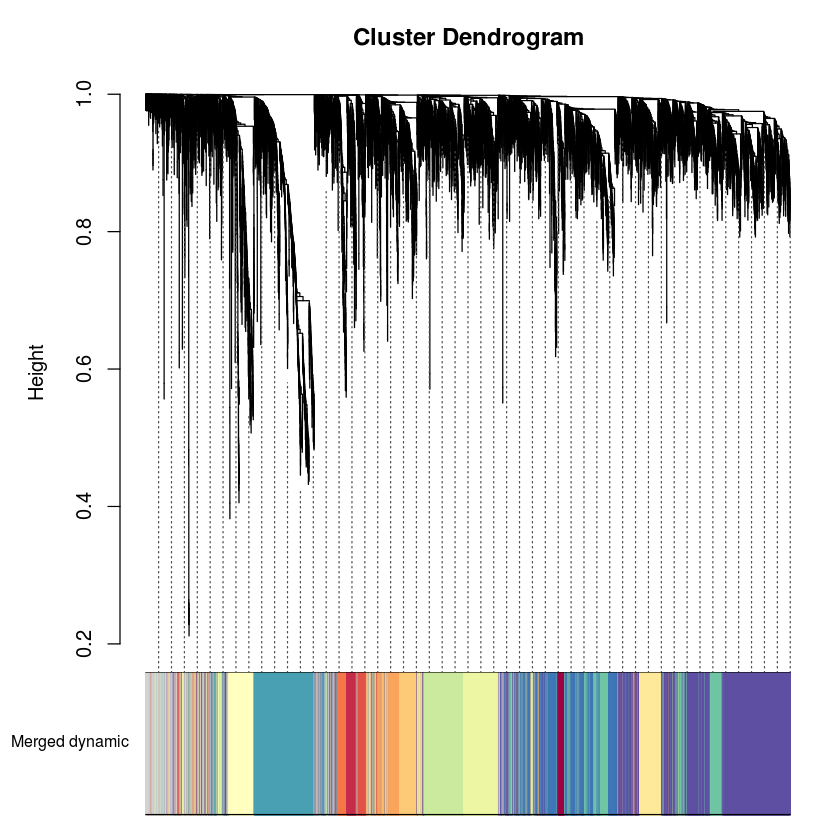

In [24]:
plotDendroAndColors(geneTree, brewer_dynamicColors,
        "Merged dynamic",
        dendroLabels = FALSE, hang = 0.03,
        addGuide = TRUE, guideHang = 0.05)

In [25]:
moduleColors <- brewer_dynamicColors

### Calculate module eigengenes

In [26]:
MEs = moduleEigengenes(datExpr, moduleColors)$eigengenes

In [27]:
write.table(datExpr, paste0(outdir, 'wgcna_rpkm.txt'), sep='\t')
write.table(MEs, paste0(outdir, 'wgcna_module_eigengenes.txt'), sep='\t')
write.table(moduleColors, paste0(outdir, 'wgcna_module_colors.txt'), sep='\t')

### Lets move forward with the 200 non respect dendro setting...

In [28]:
# Define numbers of genes and samples
nGenes = ncol(datExpr);
nSamples = nrow(datExpr);
# Recalculate MEs with color labels
MEs0 = moduleEigengenes(datExpr, moduleColors)$eigengenes

In [37]:
# Read in the clinical data for annotation
clinData = read.csv(paste0(outdir,'samples.txt'), sep='\t')
clinData$group = paste(clinData$strain, clinData$cell, clinData$diet, sep = '_')

In [38]:
# create combined data frame with clinical data and the module eigengenes.
MEClin = cbind(clinData, MEs0)


In [40]:
colnames(MEClin)

[1] "sample"    "strain"    "cell"      "diet"      "color"     "group"    
 [7] "ME#3E77B5" "ME#48A0B2" "ME#5E4FA2" "ME#6FC5A4" "ME#9E0142" "ME#C52C4B"
[13] "ME#CCEA9D" "ME#D3D3D3" "ME#E25249" "ME#EDF7A3" "ME#F57647" "ME#FBA45C"
[19] "ME#FDCA78" "ME#FEE899" "ME#FFFFBF"

In [42]:
require(ggplot2)

Loading required package: ggplot2


### Boxplot of "eigengene" values across strains
____
These basically encapsulate the overall relative expression of genes in these modules within the samples. the ME is defined as the first principal component of that specific module... not sure how to interpret that.

Warning message in structure(NULL, class = "waiver"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(NULL, class = "waiver"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(NULL, class = "waiver"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(NULL, class = "waiver"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(NULL, class = "waiver"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(NULL, class = "waiver"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.

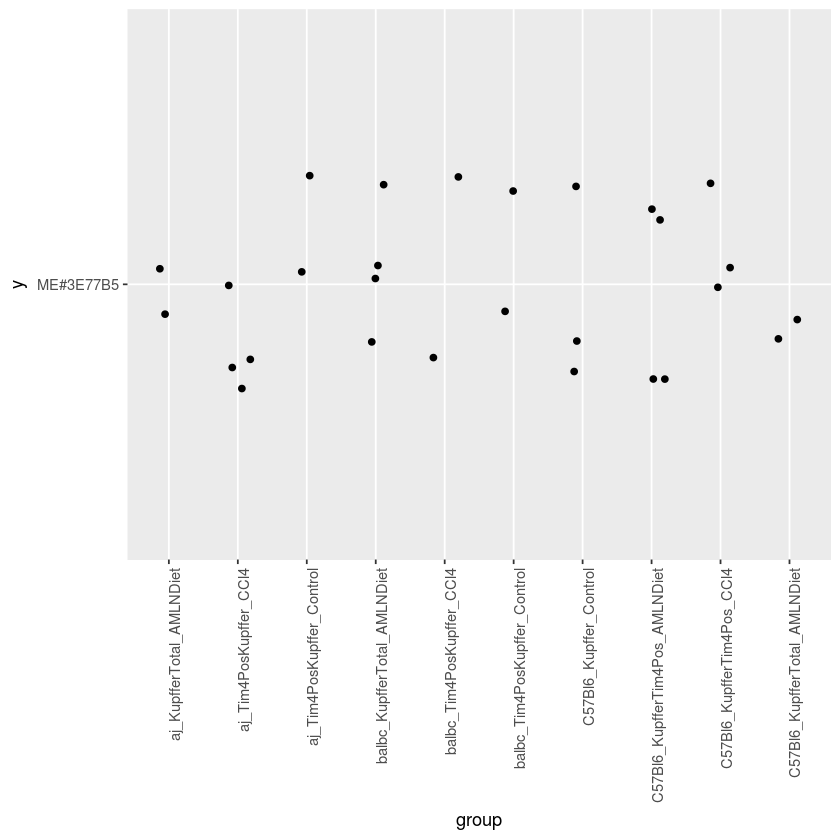

In [45]:
tmp <- ggplot(MEClin, aes(x=group, y='ME#3E77B5')) + geom_jitter(width=0.2, height=0.2)
tmp + theme(axis.text.x = element_text(angle = 90, hjust = 1))


In [46]:
colnames(MEClin)

[1] "sample"    "strain"    "cell"      "diet"      "color"     "group"    
 [7] "ME#3E77B5" "ME#48A0B2" "ME#5E4FA2" "ME#6FC5A4" "ME#9E0142" "ME#C52C4B"
[13] "ME#CCEA9D" "ME#D3D3D3" "ME#E25249" "ME#EDF7A3" "ME#F57647" "ME#FBA45C"
[19] "ME#FDCA78" "ME#FEE899" "ME#FFFFBF"

In [51]:

p1 <- ggplot(MEClin, aes(x=group, y='ME#3E77B5')) + geom_jitter(width=0.2, height=0.2)
p2 <- ggplot(MEClin, aes(x=group, y='ME#48A0B2')) + geom_jitter(width=0.2, height=0.2)
p3 <- ggplot(MEClin, aes(x=group, y='ME#5E4FA2')) + geom_jitter(width=0.2, height=0.2)
p4 <- ggplot(MEClin, aes(x=group, y='ME#6FC5A4')) + geom_jitter(width=0.2, height=0.2)
p5 <- ggplot(MEClin, aes(x=group, y='ME#9E0142')) + geom_jitter(width=0.2, height=0.2)
p6 <- ggplot(MEClin, aes(x=group, y='ME#C52C4B')) + geom_jitter(width=0.2, height=0.2)
p7 <- ggplot(MEClin, aes(x=group, y='ME#CCEA9D')) + geom_jitter(width=0.2, height=0.2)
p8 <- ggplot(MEClin, aes(x=group, y='ME#D3D3D3')) + geom_jitter(width=0.2, height=0.2)
p9 <- ggplot(MEClin, aes(x=group, y='ME#E25249')) + geom_jitter(width=0.2, height=0.2)
p10 <- ggplot(MEClin, aes(x=group, y='ME#EDF7A3')) + geom_jitter(width=0.2, height=0.2)
p11 <- ggplot(MEClin, aes(x=group, y='ME#F57647')) + geom_jitter(width=0.2, height=0.2)
p12 <- ggplot(MEClin, aes(x=group, y='ME#FDCA78')) + geom_jitter(width=0.2, height=0.2)
p13 <- ggplot(MEClin, aes(x=group, y='ME#FEE899')) + geom_jitter(width=0.2, height=0.2)
p14 <- ggplot(MEClin, aes(x=group, y='ME#FFFFBF')) + geom_jitter(width=0.2, height=0.2)

ERROR: Error in suppressWarnings(p1 <- ggplot(MEClin, aes(x = group, y = "ME#3E77B5")) + : unused arguments (p2 <- ggplot(MEClin, aes(x = group, y = "ME#48A0B2")) + geom_jitter(width = 0.2, height = 0.2), p3 <- ggplot(MEClin, aes(x = group, y = "ME#5E4FA2")) + geom_jitter(width = 0.2, height = 0.2), p4 <- ggplot(MEClin, aes(x = group, y = "ME#6FC5A4")) + geom_jitter(width = 0.2, height = 0.2), p5 <- ggplot(MEClin, aes(x = group, y = "ME#9E0142")) + geom_jitter(width = 0.2, height = 0.2), p6 <- ggplot(MEClin, aes(x = group, y = "ME#C52C4B")) + geom_jitter(width = 0.2, height = 0.2), p7 <- ggplot(MEClin, 
    aes(x = group, y = "ME#CCEA9D")) + geom_jitter(width = 0.2, height = 0.2), p8 <- ggplot(MEClin, aes(x = group, y = "ME#D3D3D3")) + geom_jitter(width = 0.2, height = 0.2), p9 <- ggplot(MEClin, aes(x = group, y = "ME#E25249")) + geom_jitter(width = 0.2, height = 0.2), p10 <- ggplot(MEClin, aes(x = group, y = "ME#EDF7A3")) + geom_jitter(width = 0.2, height = 0.2), p11 <- ggplot(MEClin, aes(x = group, y = "ME#F57647")) + geom_jitter(width = 0.2, height = 0.2), p12 <- ggplot(MEClin, aes(x = group, 
    y = "ME#FDCA78")) + geom_jitter(width = 0.2, height = 0.2), p13 <- ggplot(MEClin, aes(x = group, y = "ME#FEE899")) + geom_jitter(width = 0.2, height = 0.2), p14 <- ggplot(MEClin, aes(x = group, y = "ME#FFFFBF")) + geom_jitter(width = 0.2, height = 0.2), )


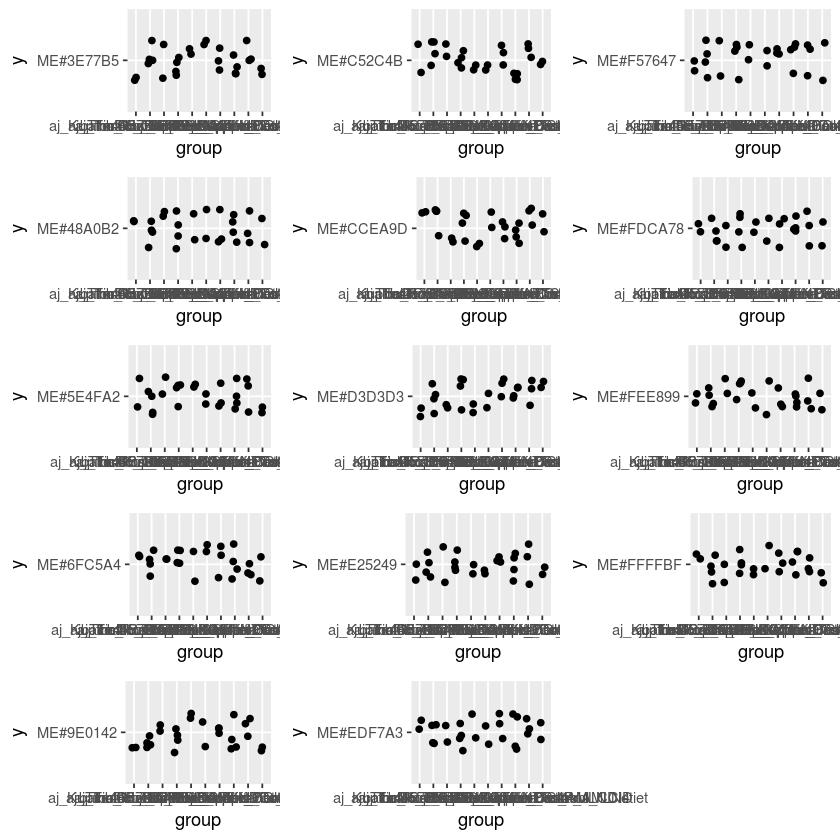

In [56]:
suppressWarnings(multiplot(
    p1,
    p2,
    p3,
    p4,
    p5,
    p6,
    p7, 
    p8,
    p9,
    p10,
    p11, 
    p12,
    p13,
    p14,
    cols=3))

### Boxplot of Gene Expression values for the different modules 

We will use the datExpr expression data for this (RPKM)

In [4]:
save(x, log2_x, colorExpr, moduleColors, file = paste0(outdir,"180123_WGCNA_Plotting.RData"))

ERROR: Error in save(x, log2_x, colorExpr, clinData, mergedColors200, mergedColors200RD, : objects ‘x’, ‘log2_x’, ‘colorExpr’, ‘clinData’, ‘mergedColors200’, ‘mergedColors200RD’ not found


In [5]:
pnames = load(paste0(outdir,"180123_WGCNA_Plotting.RData"))

In [57]:
x = matrix(as.numeric(unlist(colorExpr[, 2:ncol(colorExpr)])), nrow=nrow(colorExpr))
log2_x = log2(x + 1)
bk <- c(-100,seq(0,100,by=10))
mycols <- c("red",colorRampPalette(colors = c("white","blue"))(length(bk)-2))

ERROR: Error in unlist(colorExpr[, 2:ncol(colorExpr)]): object 'colorExpr' not found


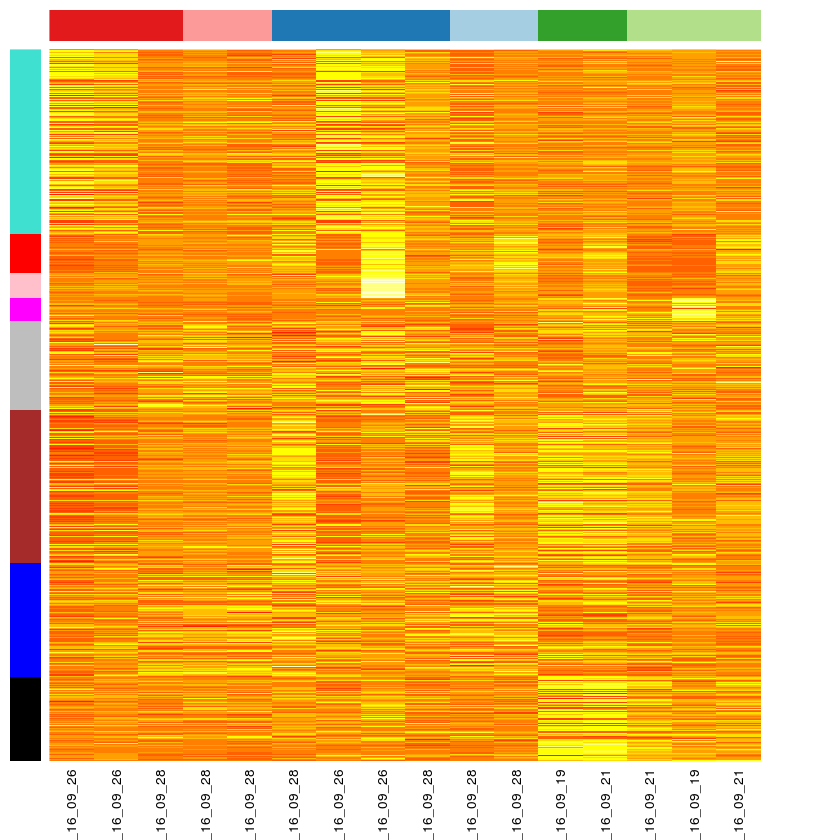

In [16]:
heatmap(x, Rowv=NA, Colv=NA, labCol=colnames(colorExpr[, 2:ncol(colorExpr)]), labRow=NA,
        RowSideColors = colorExpr[, 1], ColSideColors = clinData$color)

We will start with blue since those are genes that are highest in the balbc and aj controls

In [91]:
MEs = orderMEs(MEs0)
modNames = substring(names(MEs), 3)
geneModuleMembership = as.data.frame(cor(datExpr, MEs, use = "p"));

In [92]:
module = "blue"
column = match(module, modNames);
moduleGenes = mergedColors200==module;

In [95]:
head(geneModuleMembership[order(geneModuleMembership$MEblue, decreasing=TRUE), ], 10)

,MEblue,MEbrown,MEblack,MEmagenta,MEturquoise,MEpink,MEred,MEgrey
NM_027480,0.9749809,0.224438937,-0.6044184,-0.4353194,-0.6097289,-0.1530916,0.32290819,0.04866435
NM_001033342,0.9489203,0.038896525,-0.6838799,-0.4128968,-0.5610434,-0.1739002,0.20672153,-0.05538674
NM_031408,0.9458539,0.001285179,-0.7201431,-0.4155099,-0.4541673,-0.2010086,0.20314213,0.07917781
NR_027351,0.9375658,0.265658873,-0.5850584,-0.4965415,-0.5803018,-0.2045996,0.27952643,0.12560867
NM_001310516,0.9293883,-0.036569252,-0.7676017,-0.5106775,-0.4236309,-0.2022904,0.17732160,0.08837800
NM_001199025,0.9286572,0.225174605,-0.4853045,-0.2831416,-0.7218561,-0.3058695,0.14575931,-0.20581271
NM_199306,0.9253324,-0.105961313,-0.7838725,-0.5889532,-0.3872944,-0.2308569,0.08952527,-0.18719323
NM_001177812,0.9247678,0.341072237,-0.4536421,-0.2939258,-0.7090919,-0.2011298,0.30231347,-0.03054234
NM_010813,0.9245066,0.233938013,-0.4947600,-0.2560750,-0.7269467,-0.2607757,0.20455342,-0.04132739
NM_001159626,0.9235908,0.378169096,-0.4682423,-0.4175045,-0.6914123,-0.2061502,0.29531127,-0.02884689
